In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
import seaborn as sns
import re
import scipy.stats as st
#from function import *
data_csv = pd.read_csv("notes.csv", sep=',')
plt.rcParams['figure.figsize'] = [12, 5]

# Description des données 

In [2]:
data_csv.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:
data_csv.count()

is_genuine      170
diagonal        170
height_left     170
height_right    170
margin_low      170
margin_up       170
length          170
dtype: int64

In [4]:
data_csv.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [5]:
print(data_csv['is_genuine'].unique())
print('-'*20)
print(data_csv['diagonal'].unique())
print('-'*20)
print(data_csv['height_left'].unique())
print('-'*20)
print(data_csv['height_right'].unique())
print('-'*20)
print(data_csv['margin_low'].unique())
print('-'*20)
print(data_csv['margin_up'].unique())
print('-'*20)
print(data_csv['length'].unique())

[ True False]
--------------------
[171.81 171.67 171.83 171.8  172.05 172.57 172.38 171.58 171.96 172.14
 172.27 172.07 172.19 171.82 172.04 171.6  171.69 172.15 171.75 172.03
 172.49 172.24 172.59 172.13 172.21 172.41 172.02 171.84 172.01 172.75
 171.66 172.4  172.2  171.13 171.51 171.88 171.91 171.79 171.44 171.85
 171.73 171.59 171.71 172.22 172.32 171.62 172.53 171.97 172.09 172.11
 172.33 171.65 171.99 172.16 171.94 171.04 172.17 171.52 172.1  171.35
 171.92 171.7  171.95 172.3  171.77 171.86 171.64 172.   171.49 171.45
 171.89 172.43 171.78 172.29 171.74 172.08 171.43 171.56 171.38 171.98
 172.25 171.68 171.61 171.53 171.72 172.5  173.01 172.47]
--------------------
[104.86 103.74 103.76 103.78 103.7  104.65 103.55 103.65 103.51 104.34
 104.29 103.64 104.61 103.94 103.85 103.9  104.16 103.87 104.44 104.51
 104.22 104.28 104.14 104.23 104.01 103.75 104.05 103.77 104.03 104.33
 104.17 104.19 103.93 104.27 104.1  103.66 103.52 103.91 103.82 103.23
 103.83 104.48 104.06 103.49 103.9

## Corrélations des variables

## Authenticité des billets

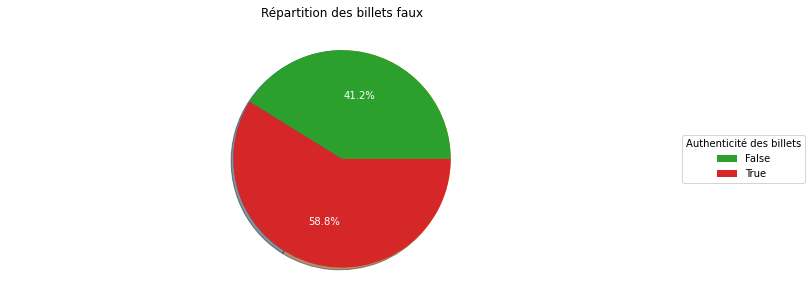

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'

data_pie = data_csv.groupby(['is_genuine']).count()

sizes1 = data_pie['diagonal']

dfidele = data_pie.index

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, shadow=True, startangle=90)
#ax1.pie(sizes2, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax1.pie(sizes1, autopct=lambda pct: func(pct, sizes1), textprops=dict(color="w"))

ax1.legend(wedges, dfidele, title="Authenticité des billets", loc="center left", bbox_to_anchor=(1, 0, 1, 1))

ax1.set_title('Répartition des billets faux')
plt.savefig('piechart')
plt.show()

## Boxplot des variables 

In [7]:
data_csv

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


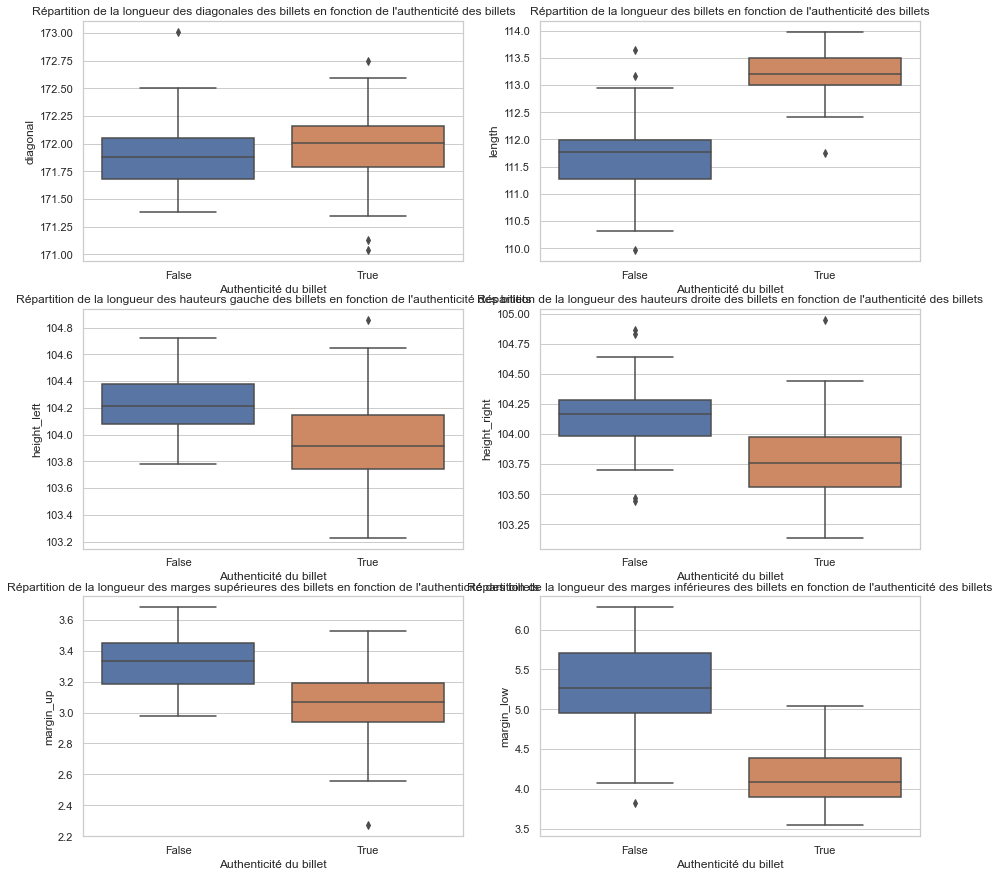

In [8]:
data1 = []
data2 = []
data3 = []
data4 = []

plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(x="is_genuine", y="diagonal",data=data_csv)
plt.title('Répartition de la longueur des diagonales des billets en fonction de l\'authenticité des billets')
plt.xlabel('Authenticité du billet')
plt.subplot(322)
sns.boxplot(x="is_genuine", y="length",data=data_csv)
plt.title('Répartition de la longueur des billets en fonction de l\'authenticité des billets')
plt.xlabel('Authenticité du billet')

plt.subplot(323)
sns.boxplot(x="is_genuine", y="height_left", data=data_csv)
plt.title('Répartition de la longueur des hauteurs gauche des billets en fonction de l\'authenticité des billets')
plt.xlabel('Authenticité du billet')
plt.subplot(324)
sns.boxplot(x="is_genuine", y="height_right", data=data_csv)
plt.title('Répartition de la longueur des hauteurs droite des billets en fonction de l\'authenticité des billets')
plt.xlabel('Authenticité du billet')
plt.subplot(325)
sns.boxplot(x="is_genuine", y="margin_up", data=data_csv)
plt.title('Répartition de la longueur des marges supérieures des billets en fonction de l\'authenticité des billets')
plt.xlabel('Authenticité du billet')
plt.subplot(326)
sns.boxplot(x="is_genuine", y="margin_low", data=data_csv)
plt.title('Répartition de la longueur des marges inférieures des billets en fonction de l\'authenticité des billets')
plt.xlabel('Authenticité du billet')
plt.savefig('boxplot')
plt.show(block=False)

In [9]:
data_csv

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


## Pairplot en fonction de l'authenticité des billets 

La variable length et également dans une moindre la variable de margin_low, présentent d'éventuelles corrélations en fonction de l'authenticité des billets.

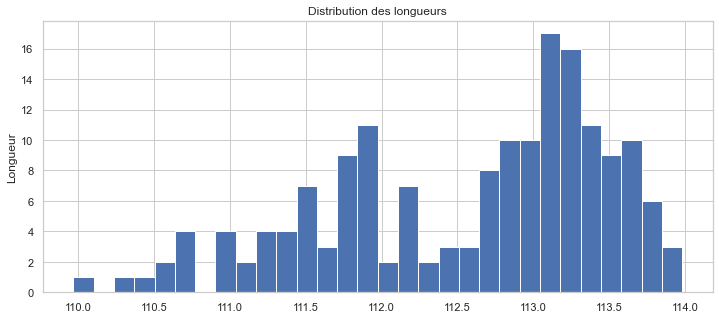

In [10]:
plt.hist(data_csv['length'],bins=30)
plt.title('Distribution des longueurs')
plt.ylabel('Longueur')
plt.show()

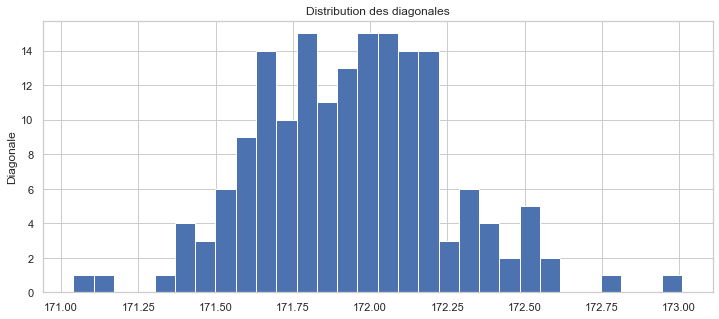

In [11]:
plt.hist(data_csv['diagonal'],bins=30)
plt.title('Distribution des diagonales')
plt.ylabel('Diagonale')
plt.show()

In [12]:
data_csv

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


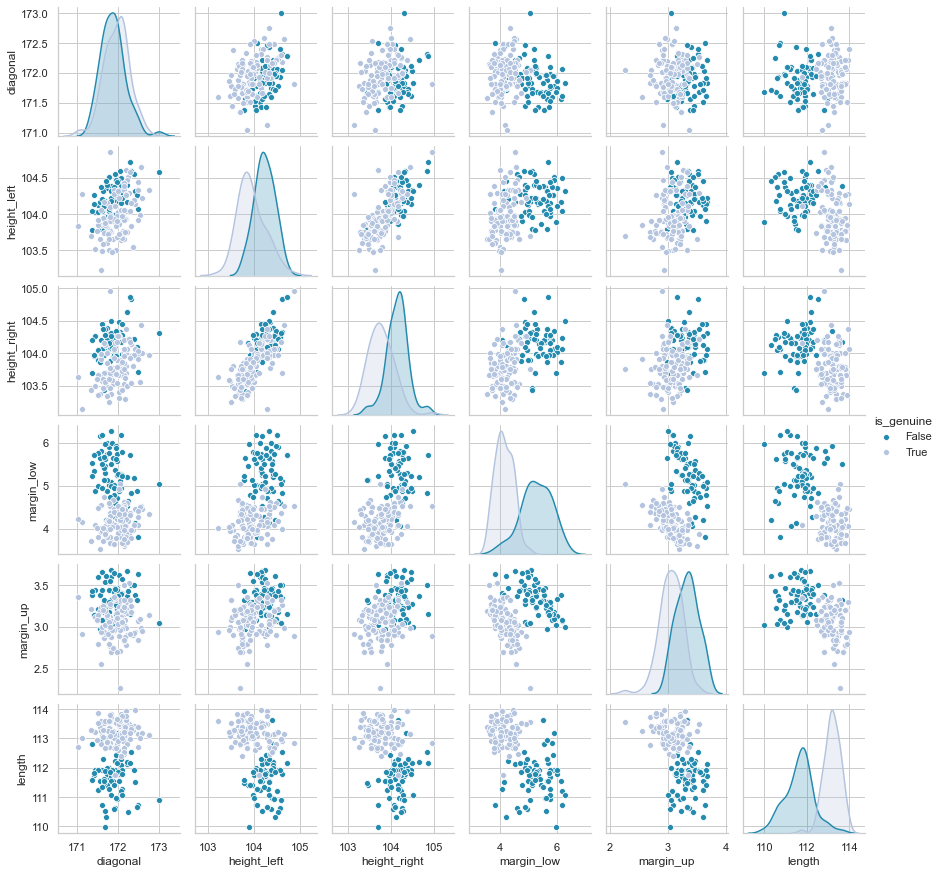

In [13]:
#data_csv = data_csv.drop(['index','clusters'],axis=1)
# pairplot with hue genuine
#pal = dict(Lunch="seagreen", Dinner=".7")
sns.pairplot(data_csv, hue ='is_genuine',palette='PuBuGn_r',height=2)

# to show 
plt.savefig('pairplot.png')
plt.show() 

## Heat map et corrélation

In [14]:
data_inter = data_csv.drop(['is_genuine'],axis=1) 

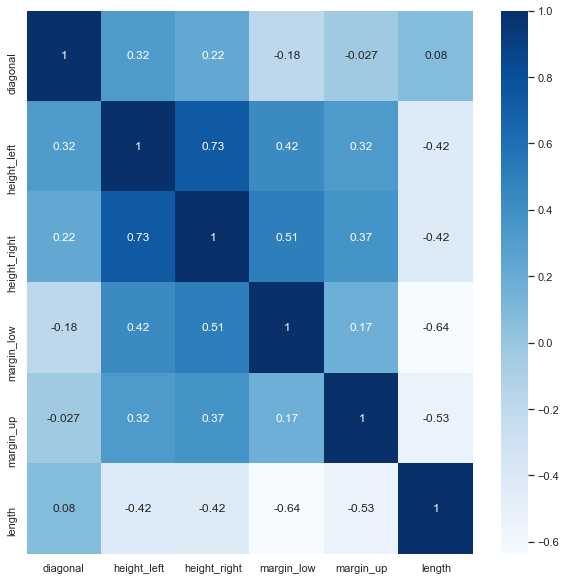

In [17]:
#data_inter = data_inter.drop(['clusters'],axis=1)
plt.figure(figsize=(10,10))

sns.heatmap(data_inter.corr(),annot=True,cmap='Blues')
plt.show()

On peut voir plusieurs potentielles corrélations ici :

- 1ère corrélation : la variable diagonale  
- 2ème corrélation : entre les hauteurs gauche et droite et la variable diagonale
- 3ème corrélation : entre les variables des hauteurs gauche et droite

On peut constater que les variables corrélées sont toutes des variables géométrique du billet

In [ ]:
plt.scatter(data_csv['height_right'],data_csv['height_left'])

plt.title('Hauteur gauche en fonction de la hauteur droite')
plt.xlabel('Hauteur droite')
plt.ylabel('Hauteur gauche')
plt.savefig('heightplot.png')
plt.show()

In [ ]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(data_csv['height_right'],data_csv['height_left'],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(data_csv['height_right'],data_csv['height_left'])[0])

Les valeurs suivent une distribution 

In [ ]:
plt.scatter(data_csv['diagonal'],data_csv['diagonal'])

plt.title('Courbe des values de la diagonale')
plt.xlabel('Diagonal')
plt.ylabel('Diagonal')
plt.savefig('diagonalplot.png')
plt.show()

In [ ]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(data_csv['diagonal'],data_csv['diagonal'],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(data_csv['diagonal'],data_csv['diagonal'])[0])

In [ ]:
figsize = [15,7]
plt.scatter(data_csv['height_left'],data_csv['diagonal'])

plt.title('Diagonale en fonction de la hauteur gauche')
plt.xlabel('Hauteur gauche')
plt.ylabel('Diagonale')
plt.savefig('diaheightplot.png')
plt.show()

In [ ]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(data_csv['diagonal'],data_csv['height_left'],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(data_csv['diagonal'],data_csv['height_left'])[0])

# Analyse en composante principale

In [ ]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            sns.set(style="whitegrid")
            plt.plot([-1, 1], [0, 0], color='grey', ls='-')
            plt.plot([0, 0], [-1, 1], color='grey', ls='-')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.savefig('corrécercle')
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig('Eboulis.png')
    plt.show(block=False)
    print(scree)

In [ ]:
from sklearn import decomposition

data = data_csv.drop(['is_genuine'],axis=1)
X = data.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA()
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)

display_scree_plot(pca)

In [ ]:
features = data.columns
pcs = pca.components_
var = ['v1','v2','v3','v4','v5','v6']

print('v1 : Diagonale')
print('v2 : Hauteur gauche')
print('v3 : Hauteur droite')
print('v4 : Marge inférieure')
print('v5 : Marge supérieure')
print('v6 : Longueur')
#display_circles(pcs, 4, pca, [(0,1),(2,3),(4,5)],labels = np.array(features))
display_circles(pcs, 4, pca, [(0,1),(2,3)],labels = np.array(var))

print('La diagonale est très corrélés à F2')
print('Les hauteurs sont corrélés sur F1')
print('Les marges sont corrélés sur F1 et la longueur y est globalement anti-corrélé')
print('Les hauteurs et la longueur sont corrélées sur F4 et anti-corrélés à la diagonale')
print(' '*5)
print('F1 : Diagonales')
print('F2 : Marges')
print('F3 : Marge inférieure')
print('F4 : Longueur horizontale et verticale')

In [ ]:
data_csv['is_genuine']

In [ ]:
data_compo = pd.DataFrame(X_projected,index=data.index,columns=["F"+str(i+1) for i in range(6)])
data_compo = data_compo.drop(['F5','F6'],axis=1)
data_compo['is_genuine'] = data_csv['is_genuine']
data_compo

# Projection des individus sur le 1er plan factoriel 

In [ ]:
figsize = [15,7]
sns.set(style="whitegrid")
plt.scatter(data_compo[data_compo['is_genuine'] == True]['F1'],data_compo[data_compo['is_genuine'] == True]['F2'],c = 'dodgerblue')
plt.scatter(data_compo[data_compo['is_genuine'] == False]['F1'],data_compo[data_compo['is_genuine'] == False]['F2'],c = 'grey')

plt.title('Projection des individus sur le premier plan factoriel')
plt.xlabel('F1')
plt.ylabel('F2')
plt.savefig('project1.png')
plt.show()

On constate que les individus true et false suivent la même progression pour des valeurs F1 différentes

# Projection des individus sur le 2ème plan factoriel 

In [ ]:
figsize = [15,7]
plt.scatter(data_compo[data_compo['is_genuine'] == True]['F3'],data_compo[data_compo['is_genuine'] == True]['F4'],c = 'dodgerblue')
plt.scatter(data_compo[data_compo['is_genuine'] == False]['F3'],data_compo[data_compo['is_genuine'] == False]['F4'],c = 'grey')

plt.title('Projection des individus sur le second plan factoriel')
plt.xlabel('F4')
plt.ylabel('F3')
plt.savefig('project2.png')
plt.show()

Ici, la perte d'information se ressent et aucune tendance n'est visible

## La qualité de représentation des individus

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data_compo.values
#instanciation
sc = StandardScaler()
#transformation
Z = sc.fit_transform(X)

acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

In [ ]:
p = data_compo.shape[1]
di = np.sum(Z**2,axis=1)
contribu = pd.DataFrame({'d_i':di})
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
data_cos = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,3],'COS2_4':cos2[:,4]})

In [ ]:
data_cos

## Qualité de représentation des individus sur F1

In [ ]:
sns.set(style="whitegrid")
plt.hist(data_cos['COS2_1'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('inertie%1.png')

## Qualité de représentation des individus sur F2

In [ ]:
plt.hist(data_cos['COS2_2'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('inertie%2.png')

## Qualité de représentation des individus sur F3

In [ ]:
plt.hist(data_cos['COS2_3'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('inertie%3.png')

## Qualité de représentation des individus sur F4

In [ ]:
plt.hist(data_cos['COS2_4'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('inertie%4.png')

## Pourcentage d'inertie sur le 1er plan factoriel

In [ ]:
#for i in data_cos['2ème plan']: 
#    print(i)

In [ ]:
data_cos['1er plan'] = data_cos['COS2_1']+data_cos['COS2_2']
data_cos['2ème plan'] = data_cos['COS2_3']+data_cos['COS2_4']

In [ ]:
plt.hist(data_cos['1er plan'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('inertie%plan1.png')

Le 1er plan factoriel est relativement bien représenté avec une majorité des individus ayant un pourcentage d'inertie au-dessus de 60 %. Ces chiffres sont notamment du à la bonne représentation des individus sur l'axe F1

## Pourcentage d'inertie sur le 2ème plan factoriel

In [ ]:
plt.hist(data_cos['2ème plan'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('inertie%plan2.png')

Notre impression sur la projection des individus sur le 2ème plan factoriel se confirme ici, les individus sont mal représentés sur ce plan 

## Contribution des individus aux axes

In [ ]:
contribu

In [ ]:
plt.hist(contribu['d_i'],bins=40)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.savefig('contribu_ind.png')

# K-Means

In [ ]:
def display_factorial_planes(X_projected, pca, axis_ranks, labels=None, alpha=1):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            sns.set(style="whitegrid")
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig('cercles_corr.png')
            plt.show(block=False)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition,preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid

data = data_csv
X = data.values
X_scaled = preprocessing.StandardScaler().fit_transform(X)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
fig_1 = plt.figure(figsize=(5,5))

#plt.style.use("fivethirtyeight")
sns.set(style="whitegrid")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Coût d'inertie")
plt.savefig('graph_cout_inert.png')
plt.show()

In [ ]:
# Projection des individus
# Réduire  ici est nécessaire car les variables sont pas exprimées dans la même unité
#std_scale = preprocessing.StandardScaler().fit(X)
#X_scaled = std_scale.transform(X)

#X_projected = pca.transform(X_scaled)

# Clustering par K-means
# 2 clusters
km = KMeans(n_clusters=2)
km.fit(X_scaled)
y_means = km.predict(X_scaled)

#clust_lab = km.labels_

In [ ]:
y_means
data_csv
#data['authen']

In [ ]:
import matplotlib.patches as mpatches
# Visualisation de nos deux clusters dans le premier plan factoriel

plt.figure(figsize=(20, 10))

categories = km.labels_
colormap = np.array(['grey','dodgerblue'])
sns.set(style="whitegrid")
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=colormap[categories], 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

lab_0 = mpatches.Patch(color='grey', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='dodgerblue', alpha=0.5, label='1')
plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)),fontsize='large')
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)),fontsize='large')
plt.title("Projection en 2 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.savefig('project_ind_kmeans.png')
plt.show()

In [ ]:
data_csv['clusters'] = categories

In [ ]:
genuine = pd.crosstab(data_csv['clusters'], data_csv["is_genuine"],margins=True,margins_name='Total')

In [ ]:
sns.heatmap(genuine.iloc[0:2,0:-1],annot=True, cmap='Blues')

## Modèle prédictif

In [ ]:
sns.set()

ax = sns.scatterplot(x="margin_up", y="clusters", data=data_csv)
#plt.plot(data_csv['margin_up'], data_csv['clusters'], color='black', label='Proportion de malades')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data_csv[['diagonal','height_left','height_right','length','margin_low','margin_up']], data_csv[['is_genuine']], train_size=0.8)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import pickle
#billet_cible = dict(zip(data_csv.diagonal.unique(),data_csv.height_left.unique(),data_csv.height_right.unique(),data_csv.margin_low.unique(),data_csv.margin_up.unique(),data_csv.length.unique()))
#print(billet_cible)
modele_logit = LogisticRegression()
modele_logit.fit(xtrain,ytrain)
precision = modele_logit.score(xtest,ytest)
#print(np.around(precision,decimals=2)*100,'%')
#print("Decision Tree classifier :: ", modele_logit)
#plt.plot(xtest[["margin_up"]], ytest, 'bo', markersize = 5)
#plt.plot(xtest[["margin_up"]], baseline_pred, color="skyblue", linewidth = 2)

# Dump the trained decision tree classifier with Pickle
# Open the file to save as pkl file
with open('model.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(modele_logit)
# Close the pickle instances
#modele_logit_model_pkl.close()

In [ ]:
#prédiction
#prediction_fruit = modele_logit.predict([[171,103.5,103.7,4.4,2.9,112]])
#billet_cible[prediction_bif[0]]
#prédiction
#prediction_fruit = modele_regLog.predict([[20,4.3,5.5]])
#billet_cible[prediction_bif[0]]

### Courbe ROC 

In [ ]:
from sklearn.metrics import roc_curve  
def plot_roc_curve(fper, tper):  
    sns.set(style="whitegrid")
    plt.plot(fper, tper, color='cornflowerblue', label='ROC')
    plt.plot([0, 1], [0, 1], color='slategrey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs = modele_logit.predict_proba(xtest)  
probs = probs[:, 1]  
#fper, tper, thresholds = roc_curve(ytest, probs) 
plot_roc_curve(fper, tper)

### Matrice de confusion

In [ ]:
data_csv = data_csv.reset_index()
ytest = ytest.reset_index()

In [ ]:
data_predict = pd.merge(data_csv,ytest,how = 'inner',on='index')
data_predict = data_predict.drop(['index'],axis=1)
#data_predict = data_predict.drop(['level_0_x','level_0_y'],axis=1)

In [ ]:
predict = pd.crosstab(data_predict['is_genuine_x'], data_predict["is_genuine_y"],rownames=['Actual'], colnames=['Predicted'],margins=True,margins_name='Total')

In [ ]:
sns.heatmap(predict.iloc[0:2,0:-1],annot=True, cmap='Blues')

### Métriques 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(' ')
print('Precision: %.3f' % precision_score(data_predict['is_genuine_x'], data_predict["is_genuine_y"]))
print('Recall: %.3f' % recall_score(data_predict['is_genuine_x'], data_predict["is_genuine_y"]))
print('Accuracy: %.3f' % accuracy_score(data_predict['is_genuine_x'], data_predict["is_genuine_y"]))
print('F1 Score: %.3f' % f1_score(data_predict['is_genuine_x'], data_predict["is_genuine_y"]))

D'après les métriques ci-dessus, aucune erreur n'a été faite dans les prédictions.

In [ ]:
print(sklearn.metrics.classification_report(data_predict['is_genuine_x'], data_predict["is_genuine_y"]))

In [ ]:
#data_csv2 = pd.read_csv("notes.csv", sep=',')
#data_csv2.data
#dat = sm.datasets.get_rdataset("data_csv").data

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from statsmodels.api import Logit
mode = Logit(endog=xtrain,ytrain)
lr = mode.fit()

lr.summary()

In [ ]:
import sys
sys.path.append('../')
from function import *